<a href="https://colab.research.google.com/github/TusharKumarChopra/HeartFailurePredictor/blob/main/HeartFailurePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [9]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [10]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [11]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [12]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [13]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [14]:
df.duplicated().sum()

0

Text(0.5, 1.0, 'Count of people with and without HeartDisease')

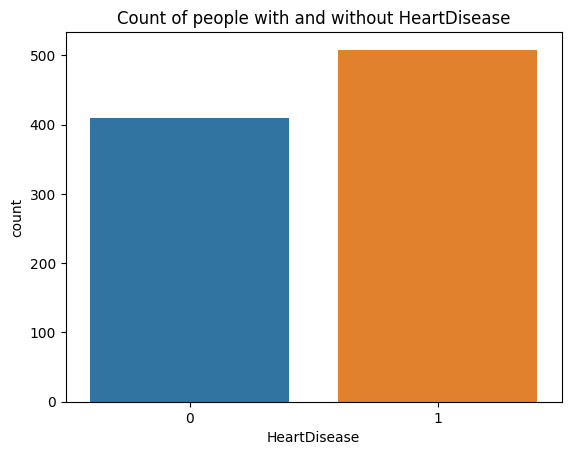

In [15]:
sns.countplot(x='HeartDisease',data=df)
plt.title('Count of people with and without HeartDisease')

### Data Cleaning

Text(0.5, 1.0, 'Distribution of Cholesterol Levels')

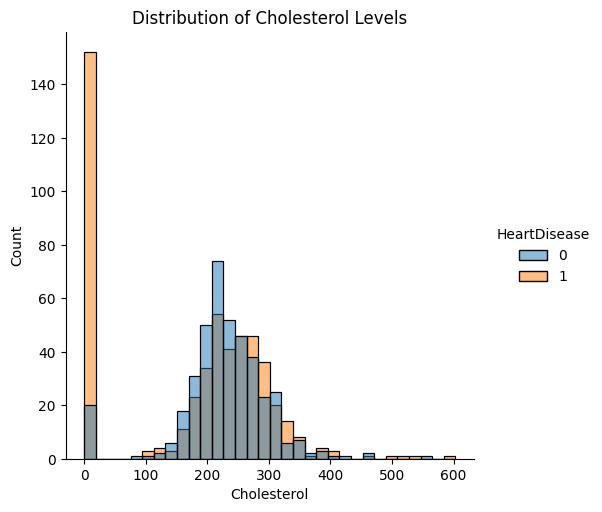

In [16]:
sns.displot(x='Cholesterol',data=df,hue='HeartDisease')
plt.title('Distribution of Cholesterol Levels')

In [17]:
df[(df['Cholesterol']==0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [18]:
df_fill = df.copy()

In [19]:
def fill_cholesterol(value):
  if value == 0:
    return df['Cholesterol'].mean()
  else:
    return value

In [20]:
df_fill['Cholesterol'] = df_fill['Cholesterol'].apply(fill_cholesterol)

In [21]:
df_fill.loc[[293,294,295,296,297]]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,198.799564,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,198.799564,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,198.799564,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,198.799564,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,198.799564,1,ST,131,Y,1.4,Up,1


Text(0.5, 1.0, 'Distribution of Cholesterol Levels after filling')

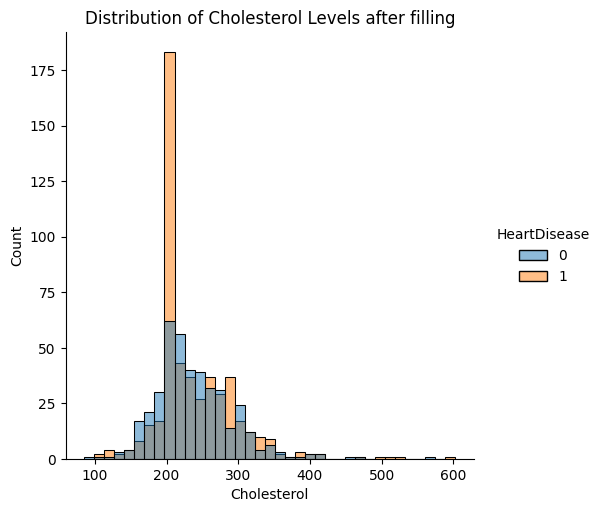

In [22]:
sns.displot(x='Cholesterol',data=df_fill,hue='HeartDisease')
plt.title('Distribution of Cholesterol Levels after filling')

Text(0.5, 1.0, 'Distribution of RestingBP')

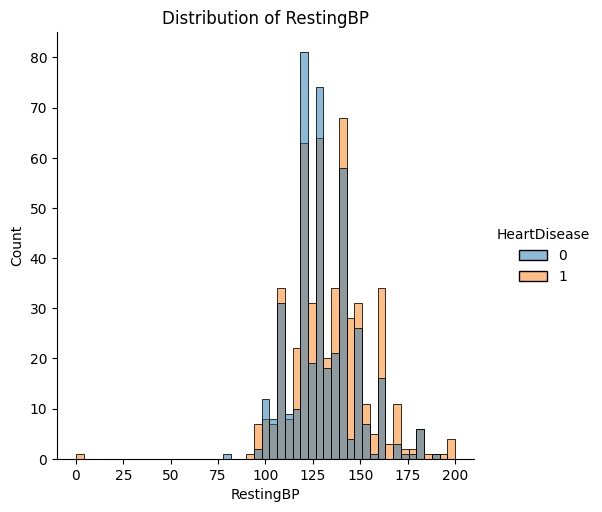

In [23]:
sns.displot(x='RestingBP',data=df_fill,hue='HeartDisease')
plt.title('Distribution of RestingBP')

In [24]:
df_fill[(df_fill['RestingBP']==0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,198.799564,0,Normal,155,N,1.5,Flat,1


In [25]:
df_fill.loc[449, 'RestingBP'] = df_fill['RestingBP'].mean()

In [26]:
df_fill.loc[449]

Age                       55
Sex                        M
ChestPainType            NAP
RestingBP         132.396514
Cholesterol       198.799564
FastingBS                  0
RestingECG            Normal
MaxHR                    155
ExerciseAngina             N
Oldpeak                  1.5
ST_Slope                Flat
HeartDisease               1
Name: 449, dtype: object

Text(0.5, 1.0, 'Distribution of RestingBP after filling')

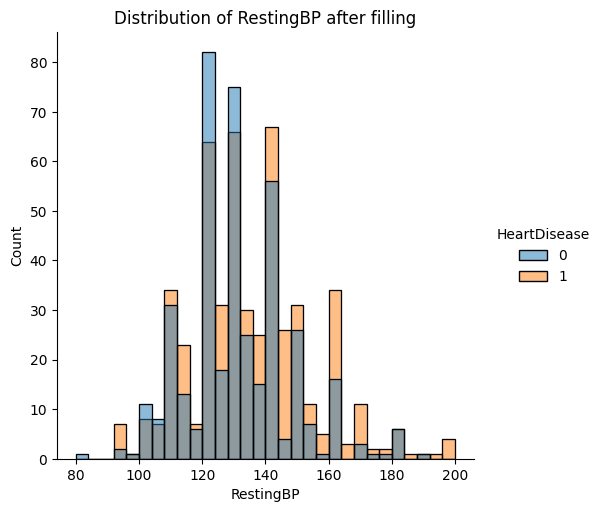

In [27]:
sns.displot(x='RestingBP',data=df_fill,hue='HeartDisease')
plt.title('Distribution of RestingBP after filling')

### Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Age')

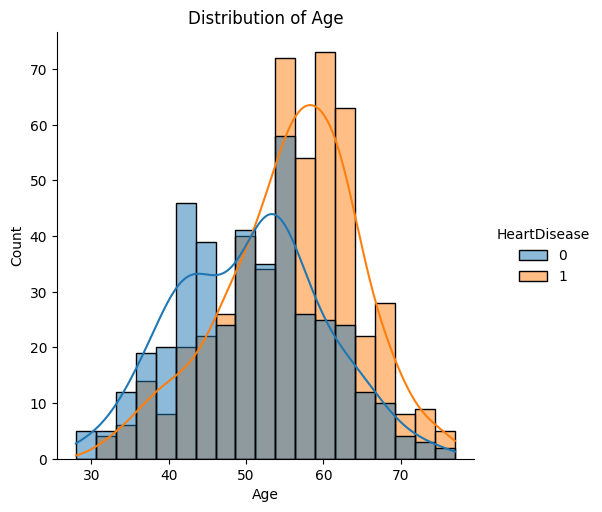

In [28]:
sns.displot(x='Age',data=df_fill,kde=True,hue='HeartDisease')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Gender & Heart Disease')

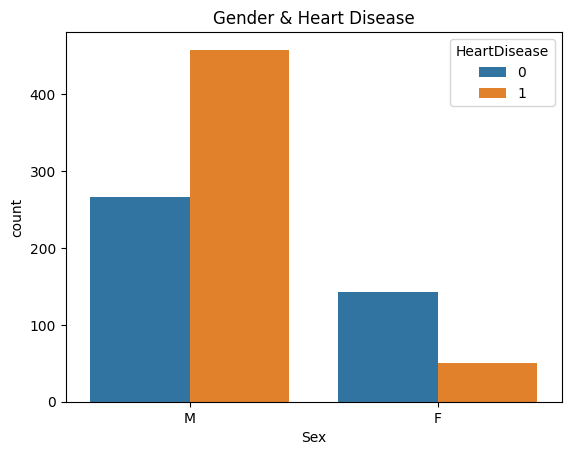

In [29]:
sns.countplot(x='Sex',data=df_fill,hue='HeartDisease')
plt.title('Gender & Heart Disease')

Text(0.5, 1.0, 'ChestPainType & Heart Disease')

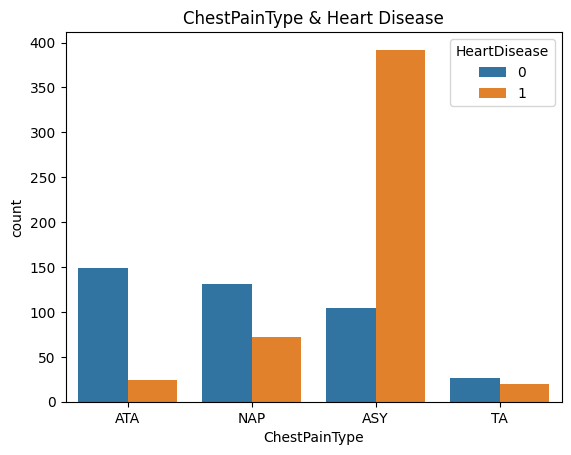

In [30]:
sns.countplot(x='ChestPainType',data=df_fill,hue='HeartDisease')
plt.title('ChestPainType & Heart Disease')

Text(0.5, 1.0, 'FastingBS & Heart Disease')

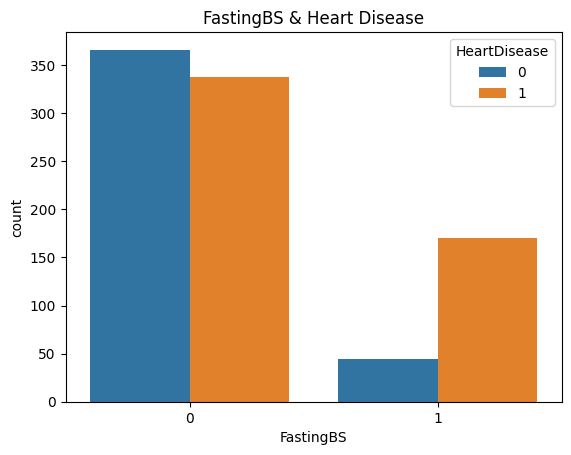

In [31]:
sns.countplot(x='FastingBS',hue='HeartDisease',data=df_fill)
plt.title('FastingBS & Heart Disease')# 1 - greater than 120; 0 - otherwise

<Figure size 960x640 with 0 Axes>

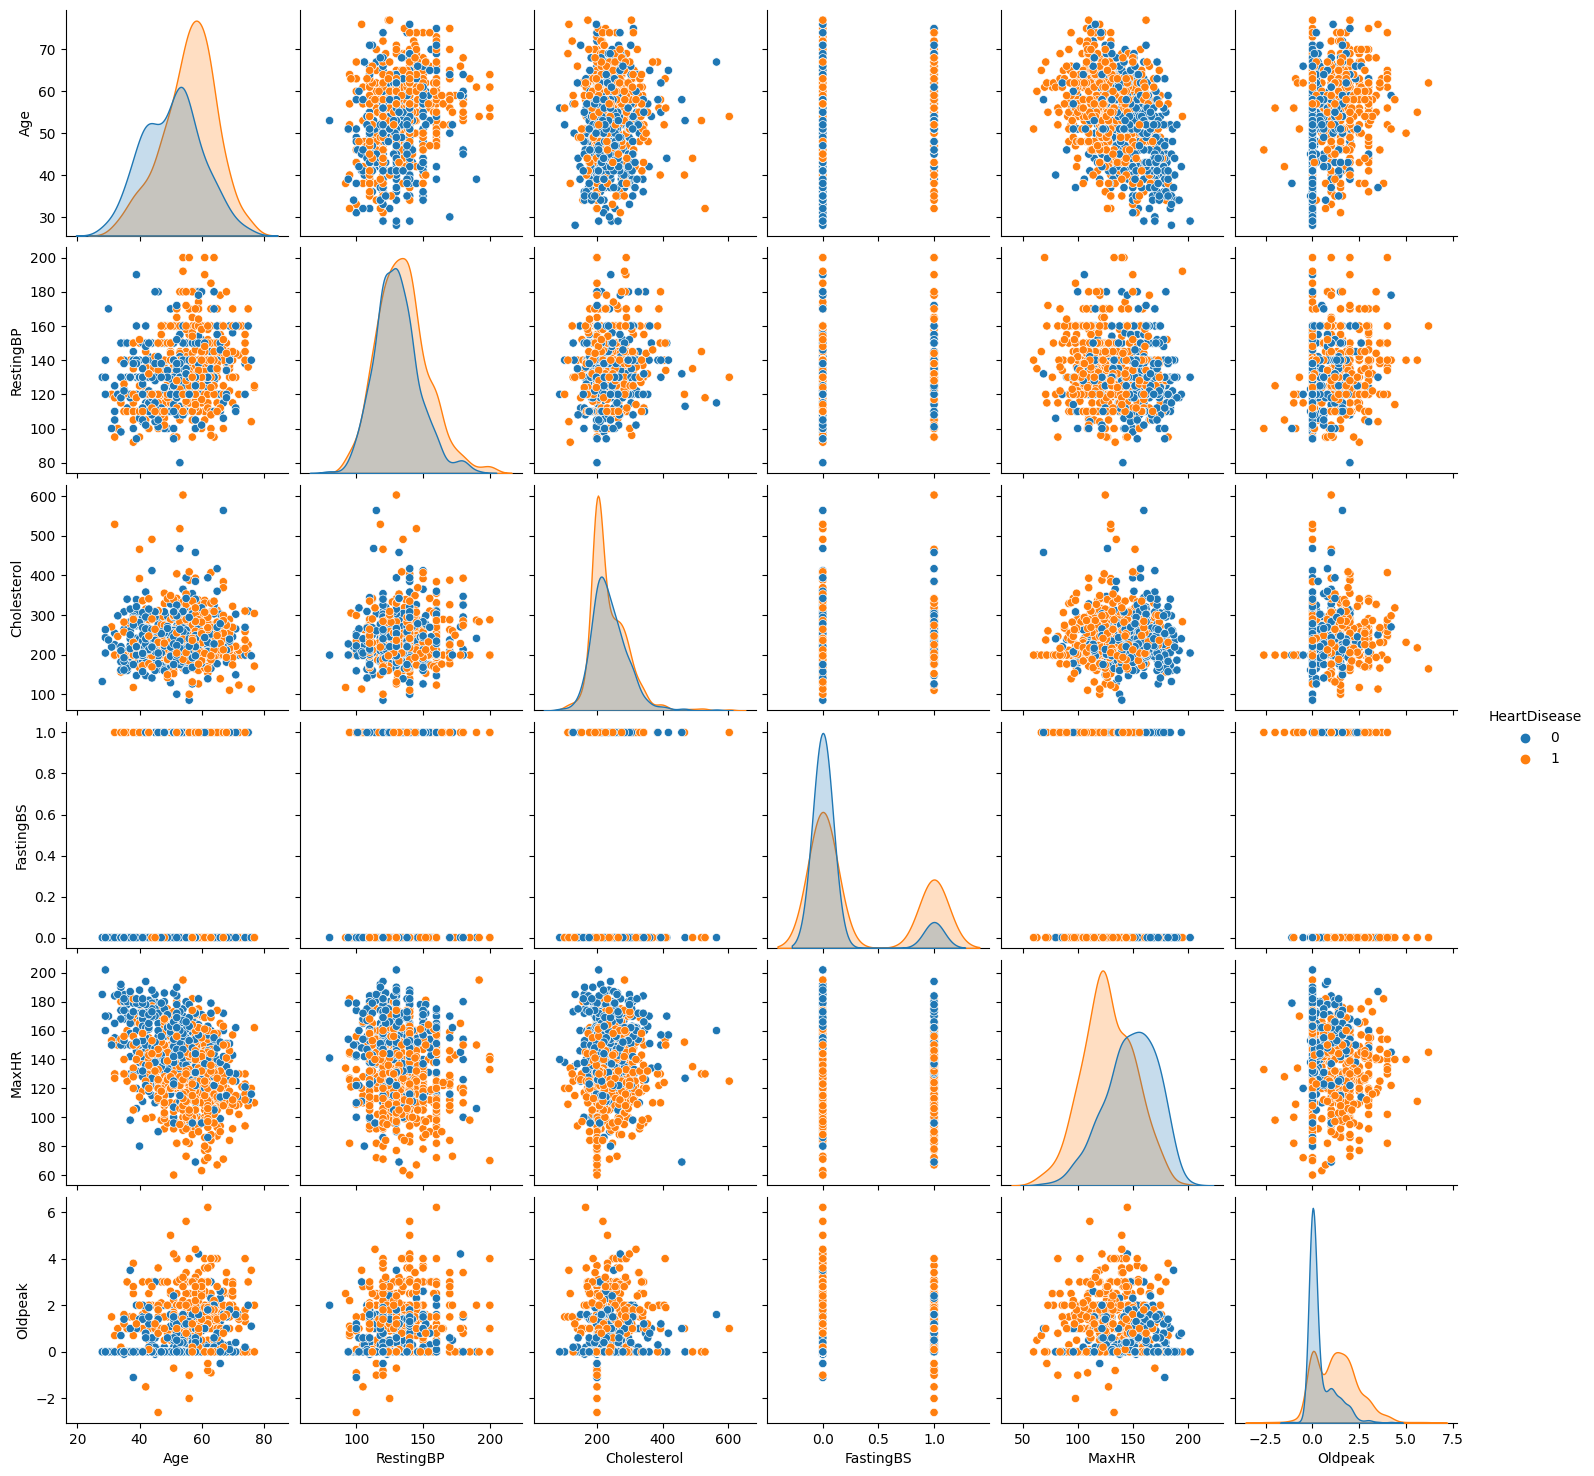

In [32]:
plt.figure(figsize=(12,8),dpi=80)
sns.pairplot(data=df_fill,hue='HeartDisease')


Text(0.5, 1.0, 'Age vs Sex')

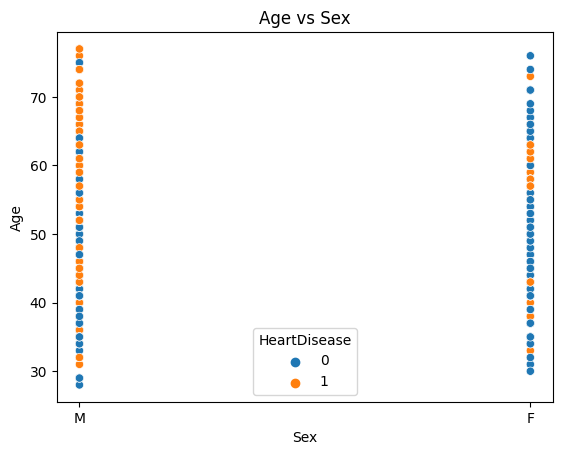

In [33]:
sns.scatterplot(y='Age',x='Sex',data=df_fill,hue='HeartDisease')
plt.title("Age vs Sex")

Text(0.5, 1.0, 'Age vs RestingBP')

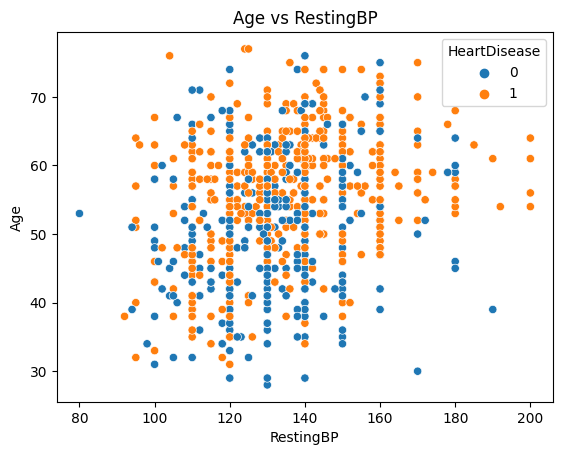

In [34]:
sns.scatterplot(x='RestingBP',y='Age',data=df_fill,hue='HeartDisease')
plt.title('Age vs RestingBP')

Text(0.5, 1.0, 'Age vs Cholesterol')

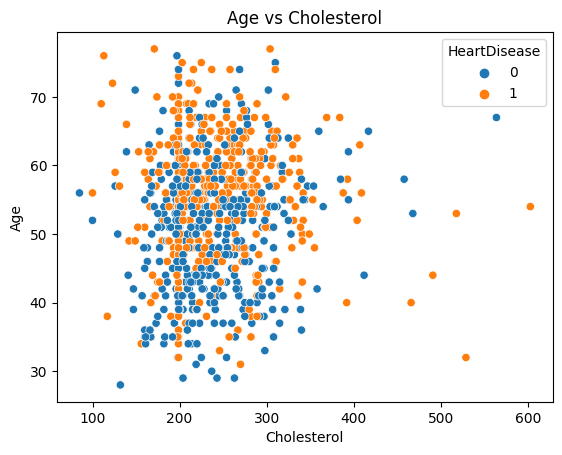

In [35]:
sns.scatterplot(x='Cholesterol',y='Age',data=df_fill,hue='HeartDisease')
plt.title('Age vs Cholesterol')

### Checking for Outliers

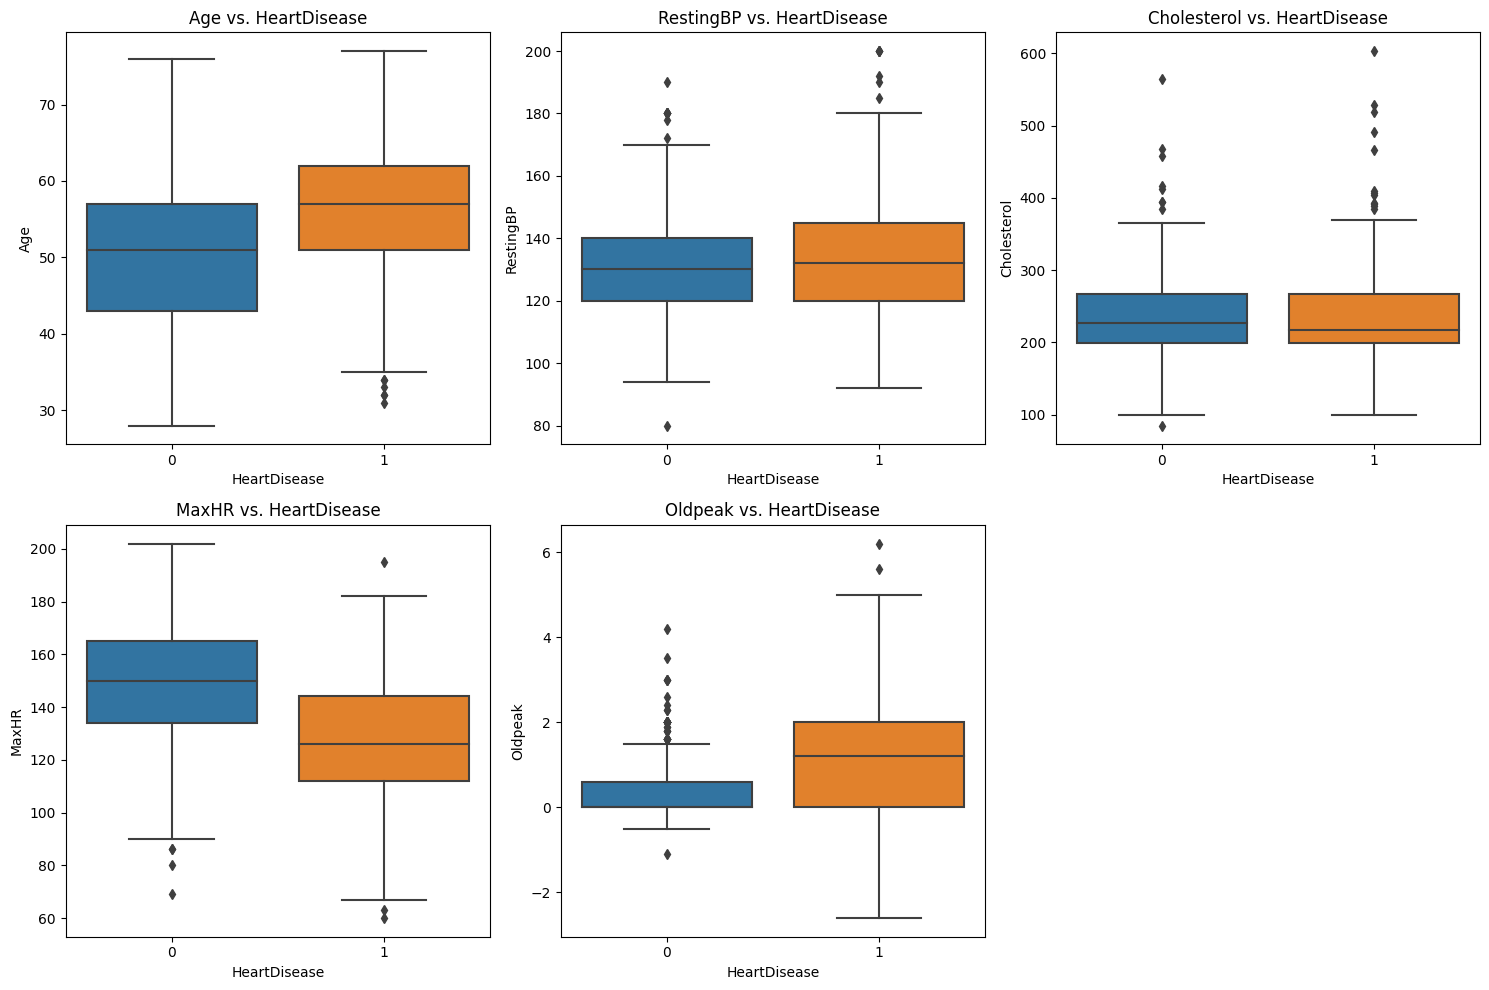

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
columns = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
for i in range(2):
    for j in range(3):
        if columns:
            column = columns.pop(0)
            sns.boxplot(x='HeartDisease', y=column, data=df_fill, ax=axes[i, j])
            axes[i, j].set_title(f'{column} vs. HeartDisease')
        else:
            axes[i, j].remove()

plt.tight_layout()

### Checking Correlation

<ipython-input-37-1673e78a2ac3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_fill.corr(),annot=True)


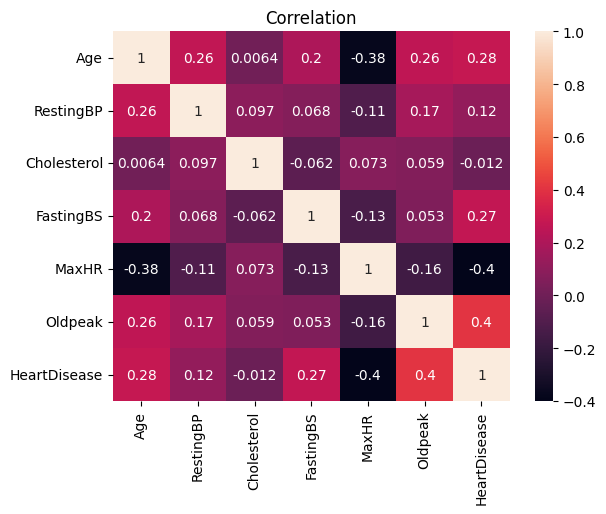

In [37]:
sns.heatmap(df_fill.corr(),annot=True)
plt.title('Correlation');

In [38]:
df_fill.corr()['HeartDisease'].sort_values(ascending=True)

<ipython-input-38-d07d4c6423fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_fill.corr()['HeartDisease'].sort_values(ascending=True)


MaxHR          -0.400421
Cholesterol    -0.012340
RestingBP       0.117930
FastingBS       0.267291
Age             0.282039
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

In [39]:
abs(df_fill.corr()['HeartDisease']).sort_values(ascending=True)

<ipython-input-39-fda53d4439b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(df_fill.corr()['HeartDisease']).sort_values(ascending=True)


Cholesterol     0.012340
RestingBP       0.117930
FastingBS       0.267291
Age             0.282039
MaxHR           0.400421
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

<ipython-input-40-0bc16b3e3767>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(df_fill.corr()['HeartDisease']).to_frame(),annot=True)


<Axes: >

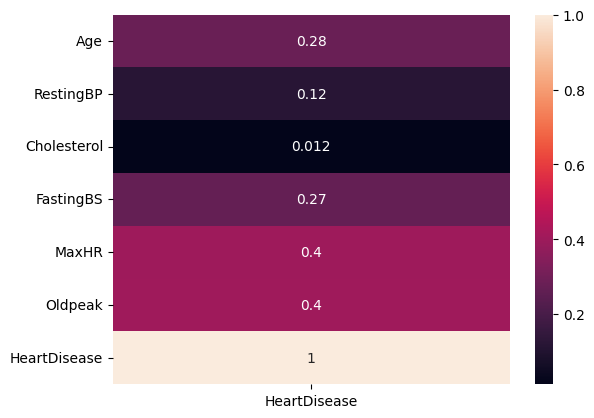

In [40]:
sns.heatmap(abs(df_fill.corr()['HeartDisease']).to_frame(),annot=True)

In [41]:
df_dummy = pd.get_dummies(df_fill,columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

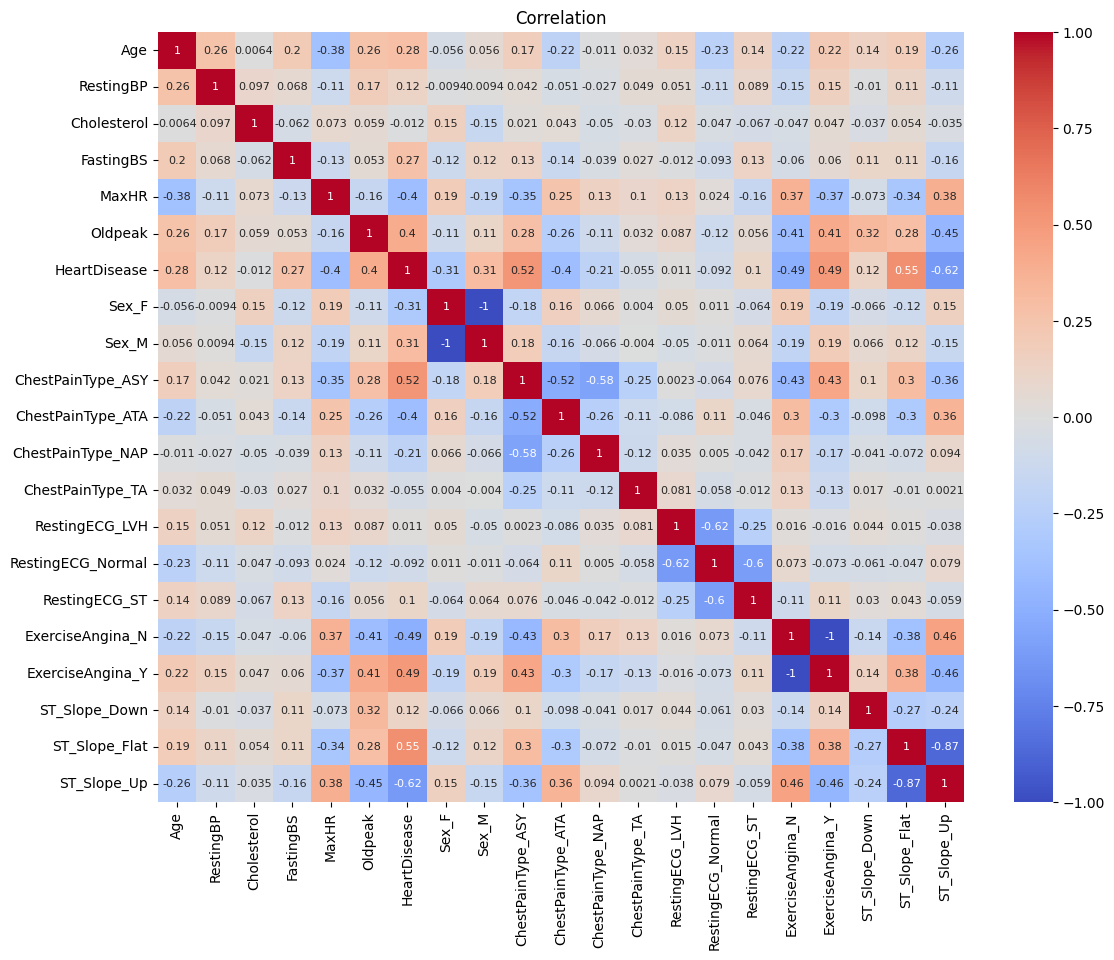

In [42]:
plt.figure(figsize=(13,10))
sns.heatmap(df_dummy.corr(), annot=True, annot_kws={"size": 8},cmap='coolwarm')
plt.title('Correlation');

In [43]:
df_dummy.corr()['HeartDisease'].sort_values(ascending=True)

ST_Slope_Up         -0.622164
ExerciseAngina_N    -0.494282
ChestPainType_ATA   -0.401924
MaxHR               -0.400421
Sex_F               -0.305445
ChestPainType_NAP   -0.212964
RestingECG_Normal   -0.091580
ChestPainType_TA    -0.054790
Cholesterol         -0.012340
RestingECG_LVH       0.010670
RestingECG_ST        0.102527
RestingBP            0.117930
ST_Slope_Down        0.122527
FastingBS            0.267291
Age                  0.282039
Sex_M                0.305445
Oldpeak              0.403951
ExerciseAngina_Y     0.494282
ChestPainType_ASY    0.516716
ST_Slope_Flat        0.554134
HeartDisease         1.000000
Name: HeartDisease, dtype: float64

In [44]:
abs(df_dummy.corr()['HeartDisease']).sort_values(ascending=True)

RestingECG_LVH       0.010670
Cholesterol          0.012340
ChestPainType_TA     0.054790
RestingECG_Normal    0.091580
RestingECG_ST        0.102527
RestingBP            0.117930
ST_Slope_Down        0.122527
ChestPainType_NAP    0.212964
FastingBS            0.267291
Age                  0.282039
Sex_F                0.305445
Sex_M                0.305445
MaxHR                0.400421
ChestPainType_ATA    0.401924
Oldpeak              0.403951
ExerciseAngina_N     0.494282
ExerciseAngina_Y     0.494282
ChestPainType_ASY    0.516716
ST_Slope_Flat        0.554134
ST_Slope_Up          0.622164
HeartDisease         1.000000
Name: HeartDisease, dtype: float64

Text(0.5, 1.0, 'Oldpeak vs Heartdisease')

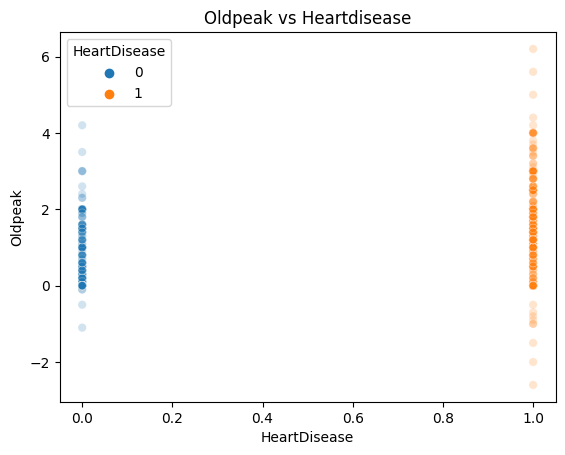

In [45]:
sns.scatterplot(x='HeartDisease',y='Oldpeak',data=df_dummy,hue='HeartDisease',alpha=0.2)
plt.title('Oldpeak vs Heartdisease')

Text(0.5, 1.0, 'Distribution of Oldpeak')

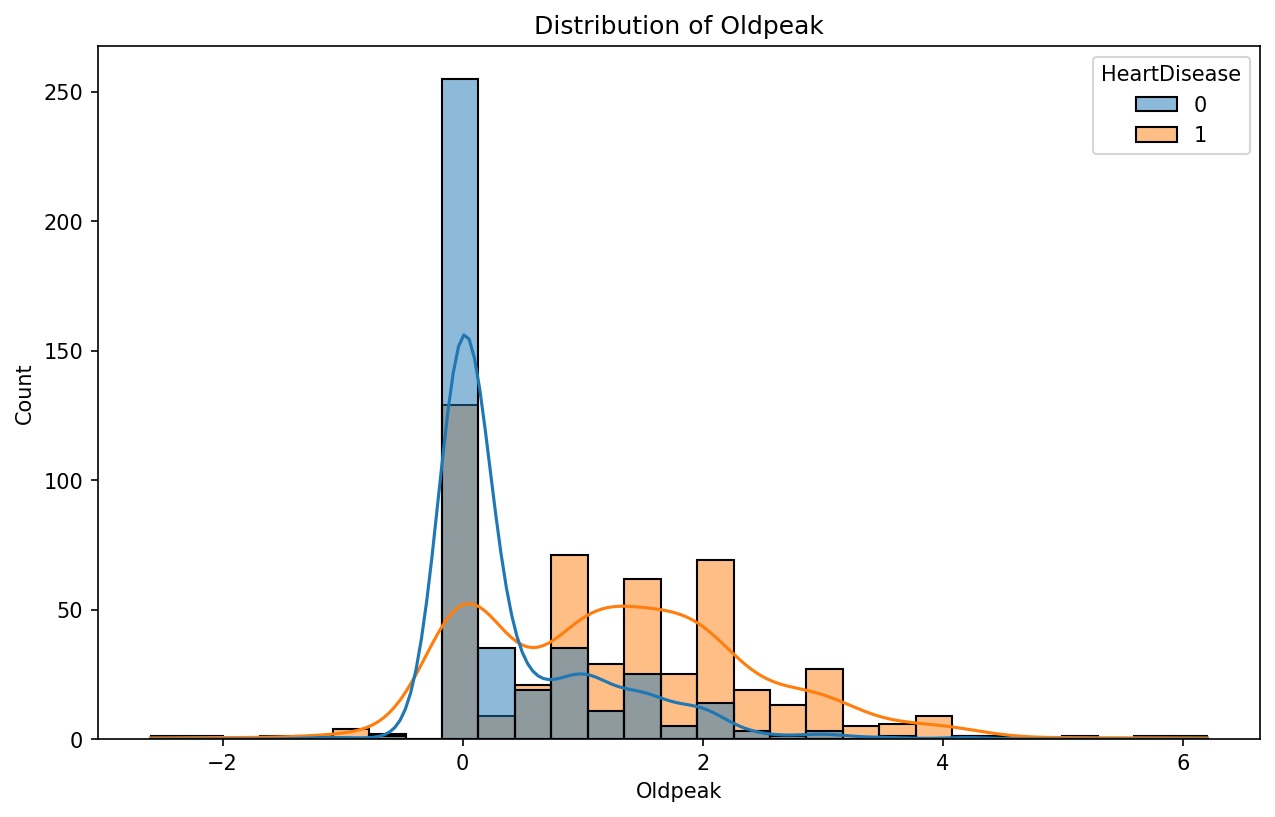

In [46]:
plt.figure(figsize=(10,6),dpi=150)
sns.histplot(x='Oldpeak',data=df_dummy,kde=True,hue='HeartDisease')
plt.title('Distribution of Oldpeak')

### **Model**

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
X = df_dummy.drop(['HeartDisease'],axis=1)
y = df_dummy['HeartDisease']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [50]:
scaler = StandardScaler()

In [51]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Logistic Regression

In [52]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
log_model = LogisticRegression()

In [55]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [56]:
y_pred = log_model.predict(scaled_X_test)

In [57]:
accuracy_score(y_test,y_pred)

0.8297101449275363

In [58]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[100,  26],
       [ 21, 129]])

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       126
           1       0.83      0.86      0.85       150

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



Text(0.5, 1.0, 'Confusion Matrix')

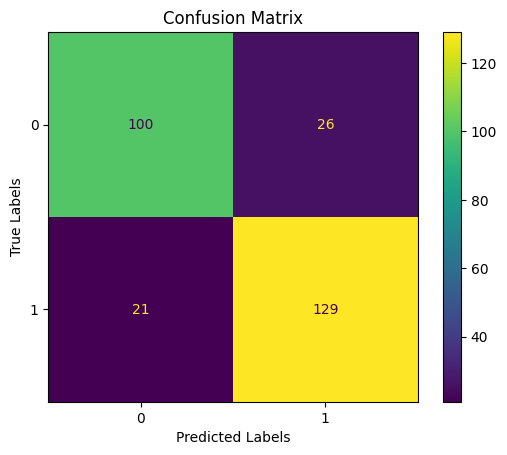

In [60]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],

    'solver': ['liblinear', 'saga']
}

logistic = LogisticRegression(max_iter=10000)

grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8405797101449275


In [63]:
cm = confusion_matrix(y_test,predictions)
cm

array([[101,  25],
       [ 19, 131]])

In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       126
           1       0.84      0.87      0.86       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



Text(0.5, 1.0, 'Confusion Matrix')

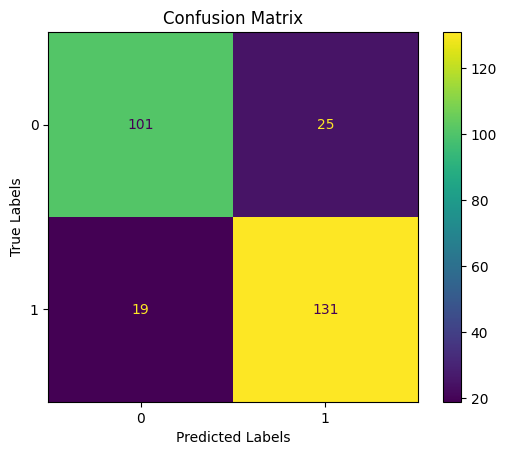

In [65]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [66]:
from sklearn.metrics import precision_recall_curve

Text(0.5, 1.0, 'Precision-Recall curve for HeartDisease present')

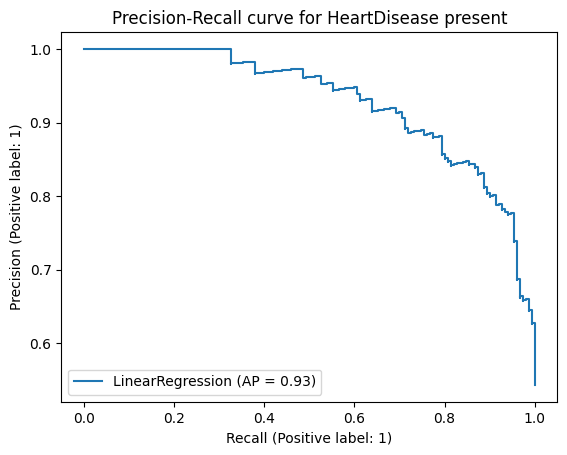

In [67]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test, name="LinearRegression")
display.ax_.set_title("Precision-Recall curve for HeartDisease present")

In [68]:
from sklearn.metrics import RocCurveDisplay

Text(0.5, 1.0, 'ROC Curve for HeartDisease-present')

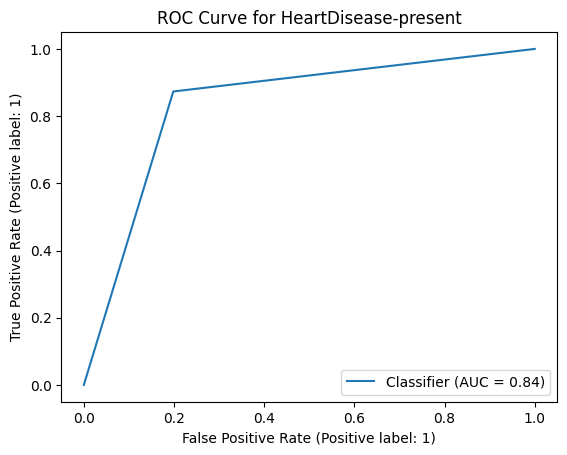

In [69]:
RocCurveDisplay.from_predictions(y_test, predictions)
plt.title('ROC Curve for HeartDisease-present')